<a href="https://colab.research.google.com/github/AkshayaGunda/User-Segmentation-and-Retention-Analysis-for-AI-Chatbot/blob/main/AB_InBev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df= pd.read_csv('data.csv')
df.head()

,#,created_at,task_status,project_key,user_email,question,feedback_sentiment,feedback
0,468,04/06/2024 10:58:42,FAILURE,Media,718228@xyz.com,NaN,NaN,NaN
1,551,04/06/2024 12:43:26,FAILURE,Marketing,825078@xyz.com,NaN,NaN,NaN
2,560,04/06/2024 12:46:53,COMPLETED,Marketing,825078@xyz.com,Who are the authors with the highest number of...,NaN,NaN
3,562,04/06/2024 12:48:49,COMPLETED,Marketing,825078@xyz.com,Who are the authors with the highest number of...,NaN,NaN
4,653,04/06/2024 13:45:55,COMPLETED,Media,718228@xyz.com,What is the revenue in Texas in 2024 Quarter 1?,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   839 non-null    int64 
 1   created_at          839 non-null    object
 2   task_status         839 non-null    object
 3   project_key         839 non-null    object
 4   user_email          839 non-null    object
 5   question            792 non-null    object
 6   feedback_sentiment  18 non-null     object
 7   feedback            12 non-null     object
dtypes: int64(1), object(7)
memory usage: 52.6+ KB


In [ ]:
df['created_at']=pd.to_datetime(df['created_at'],dayfirst = True,)

In [ ]:
df['created_at'].dt.time

0      10:58:42
1      12:43:26
2      12:46:53
3      12:48:49
4      13:45:55
         ...   
834    21:41:24
835    22:10:03
836    01:22:52
837    09:34:39
838    09:35:34
Name: created_at, Length: 839, dtype: object

In [ ]:
df.groupby([df['user_email'],df['created_at'].dt.date]).size()

user_email      created_at
132695@xyz.com  2024-06-04    17
                2024-06-05    21
                2024-06-06     2
                2024-06-07     4
                2024-06-12     4
                              ..
930356@xyz.com  2024-07-12     2
                2024-07-16     1
                2024-07-17     1
949982@xyz.com  2024-06-06     4
956102@xyz.com  2024-07-17     5
Length: 87, dtype: int64

In [ ]:
df['date'] = df['created_at'].dt.date

In [ ]:
df[df['user_email']=='33029@xyz.com']


,#,created_at,task_status,project_key,user_email,question,feedback_sentiment,feedback,date
315,2417,2024-07-04 10:05:00,FAILURE,Media,33029@xyz.com,What is the efficiency for Mich Ultra for Medi...,NaN,NaN,2024-07-04
316,2411,2024-07-04 10:05:30,FAILURE,Marketing,33029@xyz.com,What are the top 3 most talked about brands in...,NaN,NaN,2024-07-04
317,2412,2024-07-04 10:10:57,FAILURE,Marketing,33029@xyz.com,What are the top 3 most talked about brands in...,NaN,NaN,2024-07-04
318,2454,2024-07-04 10:12:29,FAILURE,Marketing,33029@xyz.com,What are the top 3 most talked about brands in...,NaN,NaN,2024-07-04
352,4576,2024-07-10 18:07:50,COMPLETED,Marketing Analytics,33029@xyz.com,What was the average maco_per_hl for the brand...,NaN,NaN,2024-07-10
...,...,...,...,...,...,...,...,...,...
831,5874,2024-07-17 21:39:22,COMPLETED,Procurement,33029@xyz.com,What scfd_package are used to produce Budweise...,NaN,NaN,2024-07-17
832,5875,2024-07-17 21:40:00,COMPLETED,Procurement,33029@xyz.com,What are the pack types available for brand St...,NaN,NaN,2024-07-17
833,5862,2024-07-17 21:40:31,COMPLETED,Procurement,33029@xyz.com,What is the Filling_volume_in_HL and cost per ...,NaN,NaN,2024-07-17
834,5855,2024-07-17 21:41:24,COMPLETED,Procurement,33029@xyz.com,What is the cost per hectoliter of producing B...,NaN,NaN,2024-07-17


In [ ]:
user_days = df.groupby('user_email')['date'].nunique().reset_index()


In [ ]:
user_days.columns = ['user_email', 'days_used']


In [ ]:
user_usage = df.groupby('user_email')['created_at'].count().reset_index()

In [ ]:
user_usage.columns = ['user_email', 'usage_count']
user_stats = pd.merge(user_days, user_usage, on='user_email')
print(user_stats)

        user_email  days_used  usage_count
0   132695@xyz.com          7           56
1   261356@xyz.com          5           16
2   270958@xyz.com          3            8
3    33029@xyz.com          6          378
4   340753@xyz.com          6           23
5   369385@xyz.com          5           82
6   373616@xyz.com          3           11
7   439479@xyz.com          1            2
8   529119@xyz.com          4           22
9   612639@xyz.com          1            2
10  614598@xyz.com          2            7
11  642160@xyz.com          1            2
12  654468@xyz.com          1            4
13  704088@xyz.com          3           10
14  718228@xyz.com          2           19
15  734515@xyz.com          7           43
16  739480@xyz.com          3           13
17  746685@xyz.com          2            4
18  825078@xyz.com          2           30
19  834169@xyz.com          6           59
20  841443@xyz.com          6           14
21  847009@xyz.com          1            1
22  865877@

In [ ]:
df['created_at'].dt.date.nunique()

29

In [ ]:
user_stats[(user_stats['days_used']<2)|(user_stats['usage_count']<6)] #user acqisation

,user_email,days_used,usage_count
7,439479@xyz.com,1,2
9,612639@xyz.com,1,2
11,642160@xyz.com,1,2
12,654468@xyz.com,1,4
17,746685@xyz.com,2,4
21,847009@xyz.com,1,1
24,930356@xyz.com,3,4
25,949982@xyz.com,1,4
26,956102@xyz.com,1,5


In [ ]:

user_days = df.groupby('user_email')['date'].nunique().reset_index()

In [ ]:
df['feedback_sentiment'].astype(str)
def points(arg):
    if arg == 'positive':
        return 1
    elif arg == 'negative':
        return -1

df['feedback_points']=df['feedback_sentiment'].apply(points)

In [ ]:
 t = df[pd.notnull(df['feedback_sentiment'])].groupby('user_email')['feedback_points'].sum().reset_index()
t

,user_email,feedback_points
0,340753@xyz.com,-5.0
1,373616@xyz.com,1.0
2,529119@xyz.com,1.0
3,865877@xyz.com,1.0
4,930356@xyz.com,-4.0


In [ ]:
t.columns = ['user_email', 'feedback_points']
user_analysis = pd.merge(user_stats, t, on='user_email',how='left')
print(user_analysis)

        user_email  days_used  usage_count  feedback_points
0   132695@xyz.com          7           56              NaN
1   261356@xyz.com          5           16              NaN
2   270958@xyz.com          3            8              NaN
3    33029@xyz.com          6          378              NaN
4   340753@xyz.com          6           23             -5.0
5   369385@xyz.com          5           82              NaN
6   373616@xyz.com          3           11              1.0
7   439479@xyz.com          1            2              NaN
8   529119@xyz.com          4           22              1.0
9   612639@xyz.com          1            2              NaN
10  614598@xyz.com          2            7              NaN
11  642160@xyz.com          1            2              NaN
12  654468@xyz.com          1            4              NaN
13  704088@xyz.com          3           10              NaN
14  718228@xyz.com          2           19              NaN
15  734515@xyz.com          7           

In [ ]:
user_analysis[(user_analysis['usage_count']<6)&(user_analysis['days_used']<3)]


,user_email,days_used,usage_count,feedback_points
7,439479@xyz.com,1,2,NaN
9,612639@xyz.com,1,2,NaN
11,642160@xyz.com,1,2,NaN
12,654468@xyz.com,1,4,NaN
17,746685@xyz.com,2,4,NaN
21,847009@xyz.com,1,1,NaN
25,949982@xyz.com,1,4,NaN
26,956102@xyz.com,1,5,NaN


In [ ]:
#engagement

In [ ]:
df['task_status'].astype(str)
daily_usage = df.groupby(['user_email','date'])['created_at'].count().reset_index(name='daily_count')
daily_usage


,user_email,date,daily_count
0,132695@xyz.com,2024-06-04,17
1,132695@xyz.com,2024-06-05,21
2,132695@xyz.com,2024-06-06,2
3,132695@xyz.com,2024-06-07,4
4,132695@xyz.com,2024-06-12,4
...,...,...,...
82,930356@xyz.com,2024-07-12,2
83,930356@xyz.com,2024-07-16,1
84,930356@xyz.com,2024-07-17,1
85,949982@xyz.com,2024-06-06,4


In [ ]:
avg_useage_perday = round(daily_usage.groupby('user_email')['daily_count'].mean().round(),2).reset_index()
avg_useage_perday

,user_email,daily_count
0,132695@xyz.com,8.0
1,261356@xyz.com,3.0
2,270958@xyz.com,3.0
3,33029@xyz.com,63.0
4,340753@xyz.com,4.0
5,369385@xyz.com,16.0
6,373616@xyz.com,4.0
7,439479@xyz.com,2.0
8,529119@xyz.com,6.0
9,612639@xyz.com,2.0


In [ ]:
avg_useage_perday.columns = ['user_email', 'Engagement_perday']
user_cohorts = pd.merge(user_analysis,avg_useage_perday, on='user_email')
print(user_cohorts)

        user_email  days_used  usage_count  feedback_points  Engagement_perday
0   132695@xyz.com          7           56              NaN                8.0
1   261356@xyz.com          5           16              NaN                3.0
2   270958@xyz.com          3            8              NaN                3.0
3    33029@xyz.com          6          378              NaN               63.0
4   340753@xyz.com          6           23             -5.0                4.0
5   369385@xyz.com          5           82              NaN               16.0
6   373616@xyz.com          3           11              1.0                4.0
7   439479@xyz.com          1            2              NaN                2.0
8   529119@xyz.com          4           22              1.0                6.0
9   612639@xyz.com          1            2              NaN                2.0
10  614598@xyz.com          2            7              NaN                4.0
11  642160@xyz.com          1            2          

In [ ]:
user_cohorts[((user_cohorts['usage_count']>30)|(user_cohorts['days_used']>=4)|(user_cohorts['feedback_points']>=0)|(user_cohorts['Engagement_perday']>=10))]

,user_email,days_used,usage_count,feedback_points,Engagement_perday
0,132695@xyz.com,7,56,NaN,8.0
1,261356@xyz.com,5,16,NaN,3.0
3,33029@xyz.com,6,378,NaN,63.0
4,340753@xyz.com,6,23,-5.0,4.0
5,369385@xyz.com,5,82,NaN,16.0
6,373616@xyz.com,3,11,1.0,4.0
8,529119@xyz.com,4,22,1.0,6.0
14,718228@xyz.com,2,19,NaN,10.0
15,734515@xyz.com,7,43,NaN,6.0
18,825078@xyz.com,2,30,NaN,15.0


In [ ]:
user_cohorts[(user_cohorts['feedback_points']<0)]

,user_email,days_used,usage_count,feedback_points,Engagement_perday
4,340753@xyz.com,6,23,-5.0,4.0
24,930356@xyz.com,3,4,-4.0,1.0


In [ ]:
 df[pd.notnull(df['feedback_sentiment'])]

,#,created_at,task_status,project_key,user_email,question,feedback_sentiment,feedback,date,feedback_points
101,3283,2024-06-05 17:21:41,COMPLETED,Marketing,865877@xyz.com,What is the most talked about brand in the USA...,positive,NaN,2024-06-05,1.0
102,3280,2024-06-05 17:23:20,COMPLETED,Marketing,865877@xyz.com,"How does Bud Light's total of 156,205 mentions...",positive,NaN,2024-06-05,1.0
105,3281,2024-06-05 17:31:23,COMPLETED,Marketing,865877@xyz.com,What is the number of mentions about Budweiser...,negative,Answer is too short,2024-06-05,-1.0
156,3425,2024-06-06 00:52:01,COMPLETED,Strategy,529119@xyz.com,How does the returnability of beer containers ...,positive,NaN,2024-06-06,1.0
204,4238,2024-06-07 15:15:45,COMPLETED,Strategy,340753@xyz.com,What is the revenue of beer sold by ABI in Mex...,negative,The data is not available,2024-06-07,-1.0
213,786,2024-06-10 14:42:32,COMPLETED,Strategy,340753@xyz.com,What are the sales figures for beer in cans in...,negative,The answer is not accurate,2024-06-10,-1.0
236,1426,2024-06-12 16:42:16,COMPLETED,Marketing,865877@xyz.com,What is the mention of Bud Light in the USA in...,negative,Not user friendly information,2024-06-12,-1.0
240,1432,2024-06-12 17:48:21,COMPLETED,Marketing,865877@xyz.com,What are the top authors that made Bud Light n...,positive,NaN,2024-06-12,1.0
251,1778,2024-06-17 17:15:55,COMPLETED,Strategy,340753@xyz.com,What are the consumer perceptions of premium b...,negative,Unit missing,2024-06-17,-1.0
253,1776,2024-06-17 17:29:12,COMPLETED,Strategy,340753@xyz.com,What is the total volume of Corona served in M...,negative,Data not available,2024-06-17,-1.0


In [ ]:
df[df['feedback'].notna()].sort_values('user_email')

,#,created_at,task_status,project_key,user_email,question,feedback_sentiment,feedback,date,feedback_points
204,4238,2024-06-07 15:15:45,COMPLETED,Strategy,340753@xyz.com,What is the revenue of beer sold by ABI in Mex...,negative,The data is not available,2024-06-07,-1.0
213,786,2024-06-10 14:42:32,COMPLETED,Strategy,340753@xyz.com,What are the sales figures for beer in cans in...,negative,The answer is not accurate,2024-06-10,-1.0
251,1778,2024-06-17 17:15:55,COMPLETED,Strategy,340753@xyz.com,What are the consumer perceptions of premium b...,negative,Unit missing,2024-06-17,-1.0
253,1776,2024-06-17 17:29:12,COMPLETED,Strategy,340753@xyz.com,What is the total volume of Corona served in M...,negative,Data not available,2024-06-17,-1.0
254,1788,2024-06-17 17:34:04,COMPLETED,Strategy,340753@xyz.com,What is the total revenue of Budweiser served ...,negative,No data available,2024-06-17,-1.0
416,4856,2024-07-12 16:54:44,COMPLETED,Procurement,373616@xyz.com,Which countries do you have data on?,negative,Failed to answer,2024-07-12,-1.0
105,3281,2024-06-05 17:31:23,COMPLETED,Marketing,865877@xyz.com,What is the number of mentions about Budweiser...,negative,Answer is too short,2024-06-05,-1.0
236,1426,2024-06-12 16:42:16,COMPLETED,Marketing,865877@xyz.com,What is the mention of Bud Light in the USA in...,negative,Not user friendly information,2024-06-12,-1.0
385,1428,2024-07-12 09:31:42,COMPLETED,Procurement,930356@xyz.com,What is the cost per hectoliter of producing S...,negative,Chart is missing,2024-07-12,-1.0
414,4820,2024-07-12 13:23:48,COMPLETED,Procurement,930356@xyz.com,What are the top Plants in terms of the highes...,negative,x-axis incorrect,2024-07-12,-1.0


In [ ]:
import numpy as np
df['task_status'].astype(str)
x=df['task_status'].value_counts()
x/839*100


task_status
COMPLETED               94.755662
FAILURE                  5.244338
Name: count, dtype: float64

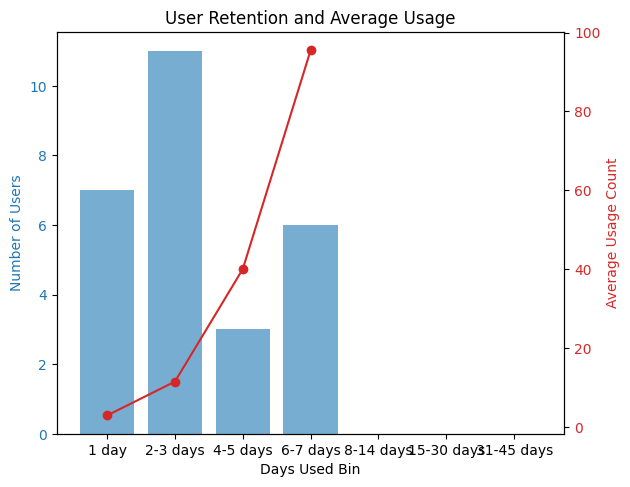

In [ ]:
import matplotlib.pyplot as plt
bins = [0, 1, 3, 5, 7, 14, 30, 45]
labels = ['1 day', '2-3 days', '4-5 days', '6-7 days', '8-14 days', '15-30 days', '31-45 days']
user_stats['days_used_bin'] = pd.cut(user_stats['days_used'], bins=bins, labels=labels)

grouped_stats = user_stats.groupby('days_used_bin',observed=False).agg(
    num_users=('user_email', 'count'),
    avg_usage=('usage_count', 'mean')
).reset_index()
fig, ax1 = plt.subplots()

# Bar chart for the number of users
color = 'tab:blue'
ax1.set_xlabel('Days Used Bin')
ax1.set_ylabel('Number of Users', color=color)
ax1.bar(grouped_stats['days_used_bin'], grouped_stats['num_users'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Line chart for the average usage count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Usage Count', color=color)
ax2.plot(grouped_stats['days_used_bin'], grouped_stats['avg_usage'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
fig.tight_layout()
plt.title('User Retention and Average Usage')
plt.show()